## Example Programs

Reference:
    - Introduction to Computation and Programming using Python 2nd edition (Python 3 version, 2016), by John Guttag, MIT Press
    
             

### Finding Square Root of a number using exhaustive enumeration

In [ ]:
def findRootExhaustive(x):
    epsilon = 0.01
    step = epsilon**2
    numGuesses = 0
    ans = 0.0
    while abs(ans**2 - x) >= epsilon and ans**2 <= x:
        ans += step
        numGuesses += 1
    print('numGuesses =', numGuesses)
    if abs(ans**2 - x) >= epsilon:
        print('Failed on square root of', x)
        return None
    else:
        return ans

x = float(input())
print(findRootExhaustive(x), 'is close to square root of', x)
# @Debug--test13

### Finding the Root of a number using bisection search

In [ ]:
def findRootBisection(x, power, epsilon):
    """
    Assumes x and epsilon int or float, power an int,epsilon > 0 & power >= 1
    Returns float y such that y**power is within epsilon of x.
    If such a float does not exist, it returns None
    """

    if x < 0 and power%2 == 0: #Negative number has no even-powered roots
        return None
    low = min(-1.0, x)
    high = max(1.0, x)
    ans = (high + low)/2.0
    while abs(ans**power - x) >= epsilon:
        if ans**power < x:
            low = ans
        else:
            high = ans
        ans = (high + low)/2.0
    return ans
# @ Debug--test14

In [ ]:
def testFindRootBisection():
    epsilon = 0.0001
    for x in [0.25, -0.25, 2, -2, 8, -8]:
        for power in range(1, 4):
            print('Testing x =',x,'and power = ', power)
            result = findRootBisection(x, power, epsilon)
            if result == None:
                print(' No root')
            else:
                print('result=',result,'result**power=',result**power, '~=', x)

In [ ]:
testFindRootBisection()

### Iteration Vs Recursion

In [ ]:
def factI(n):
    '''
    Assumes n an int > 0
    Returns factorial of n
    '''
    result = 1
    while n > 1:
        result = result * n
        n -= 1
    return result


In [ ]:
factI(10)

In [ ]:
def factR(n):
    '''
    Assumes n an int > 0
    Returns factorial of n
    '''
    if n == 1:
        return n
    return n* factR(n - 1)

# @ Debug--test15

In [ ]:
factR(10)

In [ ]:
def fib(n):
    """Assumes n int >= 0
    Returns Fibonacci of n"""
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
#@ Debug--test16

In [ ]:
def testFib(n):
    for i in range(n+1):
        print('fib of', i, '=', fib(i))

In [ ]:
testFib(10)

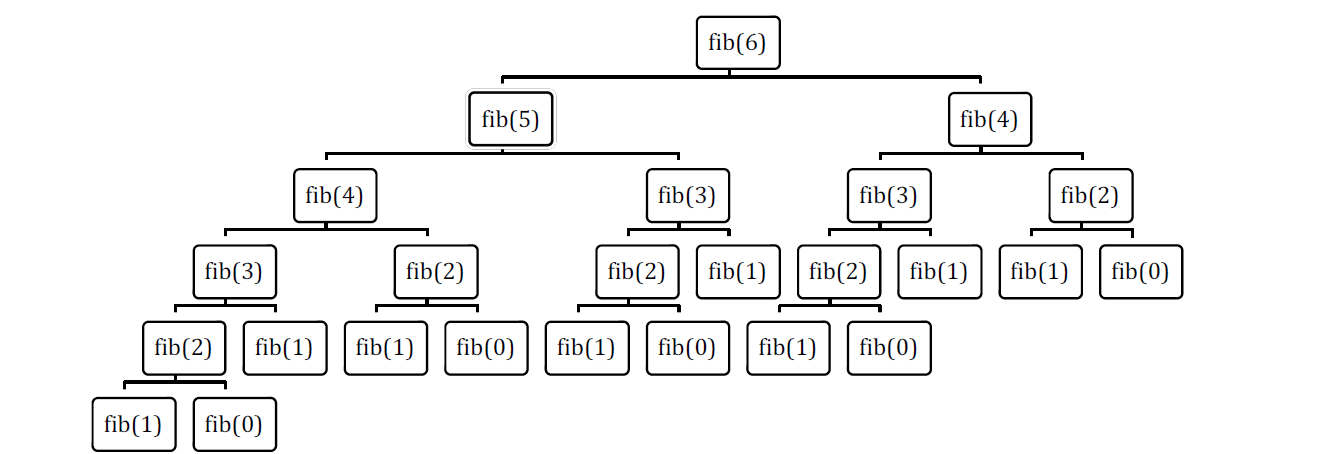

Source: Introduction to Computation and Programming using Python 2nd edition (Python 3 version, 2016), by John Guttag, MIT Press

### Memoization

In [ ]:
def fastFib(n, memo = {}):
    """Assumes n is an int >= 0, memo used only by recursive calls
       Returns Fibonacci of n
    """
    if n == 0 or n == 1:
        return 1
    try:
        return memo[n]
    except KeyError:
        result = fastFib(n-1, memo) + fastFib(n-2, memo)
        memo[n] = result
    return result

#@ Debug--test17

In [ ]:
fastFib(120)

In [ ]:
def isPalindrome(s):
    """Assumes s is a str
    Returns True if letters in s form a palindrome; False
    otherwise. Non-letters and capitalization are ignored."""
    def toChars(s):
        s = s.lower()
        letters = ''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                letters = letters + c
        return letters
    
    def isPal(s):
        if len(s) <= 1:
            return True
        else:
            return s[0] == s[-1] and isPal(s[1:-1])
        
    return isPal(toChars(s))

In [ ]:
isPalindrome('A dog! A panic in a pagoda!')

### Finding smallest and largest common divisors

In [ ]:
def findExtremeDivisors(n1, n2):
    """Assumes that n1 and n2 are positive ints
    Returns a tuple containing the smallest common divisor > 1 and
    the largest common divisor of n1 and n2. If no common divisor,
    returns (None, None)"""
    minVal, maxVal = None, None
    for i in range(2, min(n1, n2) + 1):
        if n1%i == 0 and n2%i == 0:
            if minVal == None:
                minVal = i
            maxVal = i
    return (minVal, maxVal)

In [ ]:
minDivisor, maxDivisor = findExtremeDivisors(100, 200)
minDivisor,maxDivisor

### Higher Order Functions

In [ ]:
def applyToEach(L, f):
    """Assumes L is a list, f a function
    Mutates L by replacing each element, e, of L by f(e)"""
    for i in range(len(L)):
        L[i] = f(L[i])
        
L = [1, -2, 3.33]
print('L =', L)
print('Apply abs to each element of L.')
applyToEach(L, abs)
print('L =', L)

print('Apply int to each element of', L)
applyToEach(L, int)
print('L =', L)

print('Apply factorial to each element of', L)
applyToEach(L, factR)
print('L =', L)


In [14]:
lis = [{ "name" : "Hamza", "age" : 20},  
{ "name" : "Rafay", "age" : 20 }, 
{ "name" : "Mohib" , "age" :15 }] 


In [11]:
print(sorted(lis, key = lambda i: i['age']))

[{'name': 'Mohib', 'age': 15}, {'name': 'Rafay', 'age': 20}, {'name': 'Hamza', 'age': 23}]


In [15]:
print(sorted(lis, key = lambda i: (i['age'], i['name'])) )

[{'name': 'Mohib', 'age': 15}, {'name': 'Hamza', 'age': 20}, {'name': 'Rafay', 'age': 20}]


### Making Random Choices and Probabilities

In [ ]:
import random
def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [ ]:
rollN(10)

In [ ]:
def checkPascal(numTrials):
    """Assumes numTrials an int > 0
    Prints an estimate of the probability of winning"""
    numWins = 0
    for i in range(numTrials):
        for j in range(24):
            d1 = rollDie()
            d2 = rollDie()
            if d1 == 6 and d2 == 6:
                numWins += 1
                break
    print('Probability of winning =', numWins/numTrials)

In [ ]:
checkPascal(10000)

In [ ]:
def variance(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X
    """
    mean = sum(X)/len(X)
    total = 0.0
    for x in X:
        total += (x - mean)**2
    return total/len(X)

def stdDev(X):
    """
    Assumes that X is a list of numbers.
    Returns the standard deviation of X
    """
    return variance(X)**0.5

In [ ]:
import random

randints = [random.randint(1,101) for i in range(15)]
print(randints)
print(sum(randints)/len(randints))
print(stdDev(randints))

In [ ]:
def CoVariance(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')


In [ ]:
randints = [random.randint(1,1001) for i in range(100000)]
#print(randints)
print(sum(randints)/len(randints))
print(stdDev(randints))
print(CoVariance(randints))